# "Audience Rating Prediction "



Question: With the given dataset, build a model to predict 'audience_rating'. Demonstrate the working of the pipeline with a notebook, also validate the model for its accuracy.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import joblib


In [8]:

# Load the dataset
data_path = "F:\\ZOHO exam\\Rotten_Tomatoes_Movies3.xls"
df = pd.read_excel(data_path, engine="xlrd")

# Data Overview
print("Dataset Overview:")
print(df.head())



Dataset Overview:
                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...    

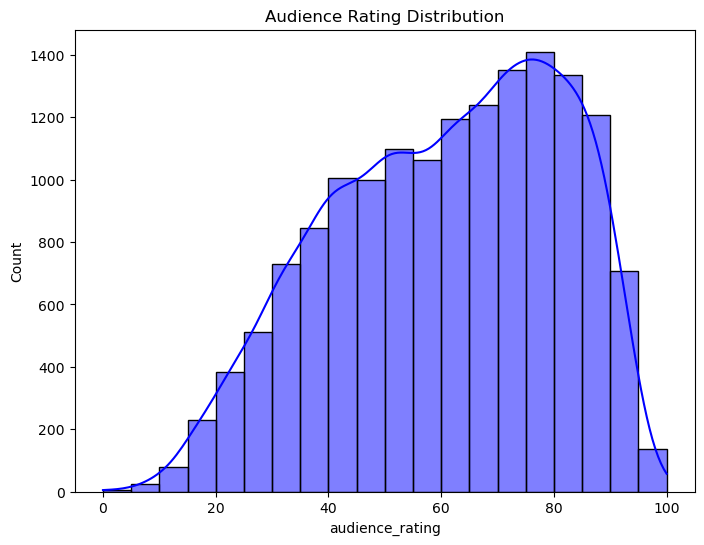

In [37]:
# Visualizing the distribution of 'audience_rating'
plt.figure(figsize=(8, 6))
sns.histplot(data['audience_rating'], kde=True, bins=20, color='blue')
plt.title("Audience Rating Distribution")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13112\2891154310.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


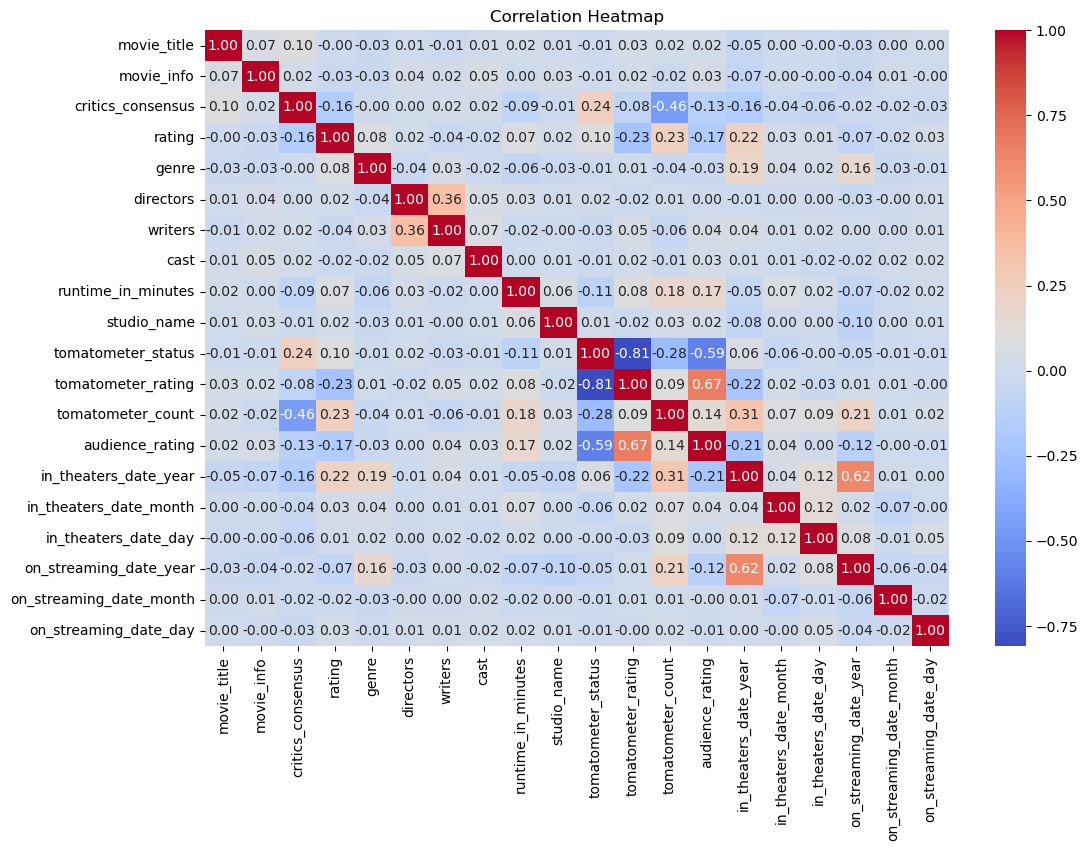

In [38]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:

# Data Cleaning
print("\nMissing Values:")
print(df.isnull().sum())




Missing Values:
movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64


In [20]:
# Handle datetime columns

datetime_cols = data.select_dtypes(include=['datetime']).columns
print("\nDatetime Columns:", datetime_cols)
     

for col in datetime_cols:
    data[col + "_year"] = data[col].dt.year
    data[col + "_month"] = data[col].dt.month
    data[col + "_day"] = data[col].dt.day
     

data = data.drop(columns = datetime_cols)
     

for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str)
     

data = data.dropna()



Datetime Columns: Index([], dtype='object')


In [23]:
# Label Encoding for categorical features

label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])
     

def categorize_rating(rating):
    if rating <= 5:
        return "Low"
    elif rating <= 8:
        return "Medium"
    else:
        return "High"
     

data["audience_class"] = data["audience_rating"].apply(categorize_rating)
     

X = data.drop(columns=["audience_rating", "audience_class"])
y = data["audience_class"]
     

print("Class Distribution in Training Data:")
print(y.value_counts())

Class Distribution in Training Data:
High      15525
Low          10
Medium       10
Name: audience_class, dtype: int64


In [27]:
# Feature-target split
from imblearn.over_sampling import SMOTE


# Handle class imbalance (optional, if required)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
     
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Evaluate model:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
     

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)



Confusion Matrix:
[[3115    1    0]
 [   0 3073    0]
 [   2    0 3124]]

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      3116
         Low       1.00      1.00      1.00      3073
      Medium       1.00      1.00      1.00      3126

    accuracy                           1.00      9315
   macro avg       1.00      1.00      1.00      9315
weighted avg       1.00      1.00      1.00      9315



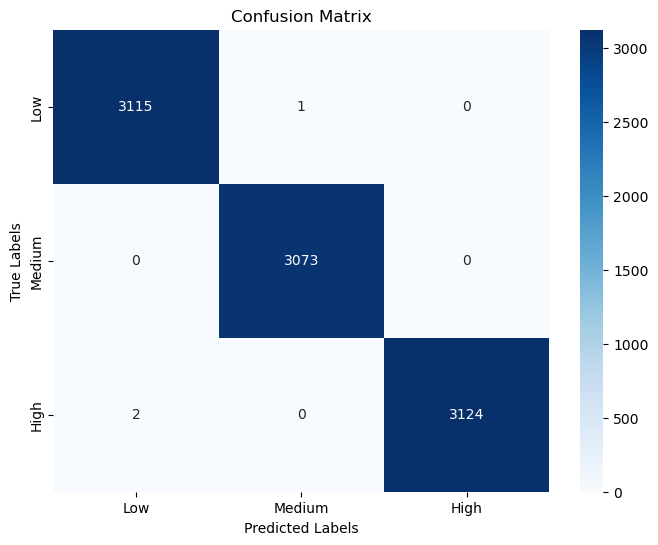

In [26]:
# Confusion Matrix:

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
     

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
     

conf_matrix = confusion_matrix(y_test, y_pred)
     

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

In [29]:
# Hyperparameter tuning
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 150}


In [35]:
# Final model evaluation
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))





Model Evaluation:
Accuracy: 0.9996779388083736


In [31]:
# Save the pipeline
pipeline_path = "audience_rating_pipeline.pkl"
joblib.dump(best_pipeline, pipeline_path)
print(f"Pipeline saved at {pipeline_path}")


Pipeline saved at audience_rating_pipeline.pkl


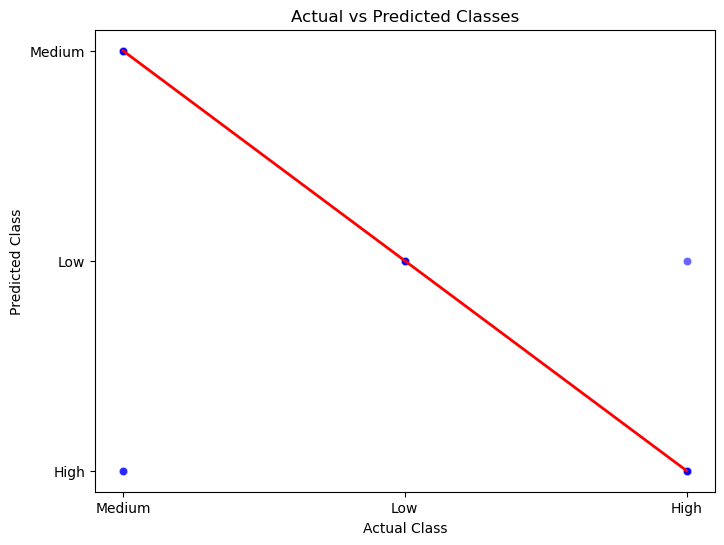

In [36]:
# Visualization of actual vs predicted
def plot_predictions(y_actual, y_predicted):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_actual, y=y_predicted, alpha=0.6, color='blue')
    plt.plot([0, 2], [0, 2], color='red', lw=2)  # Adjusted for classification
    plt.xlabel('Actual Class')
    plt.ylabel('Predicted Class')
    plt.title('Actual vs Predicted Classes')
    plt.show()

plot_predictions(y_test, y_pred)
